 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [281]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [282]:
# Reading whale returns
csvpath = Path("Resources\whale_returns.csv")
whale_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\2115112265.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [283]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [284]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [285]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [286]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [287]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [288]:
# Reading S&P 500 Closing Prices
csvpath = Path("Resources\sp500_history.csv")
sp500_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True) 
sp500_returns.sort_index(inplace=True)
sp500_returns.head()

C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\695262862.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\695262862.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [289]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [290]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$','')
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [291]:
# Change Data Types
sp500_returns['Close'] = sp500_returns['Close'].astype('float')
sp500_returns.dtypes

Close    float64
dtype: object

In [292]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [293]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [294]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [295]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

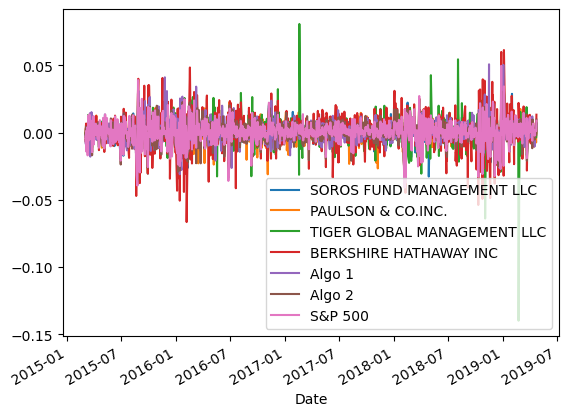

In [296]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


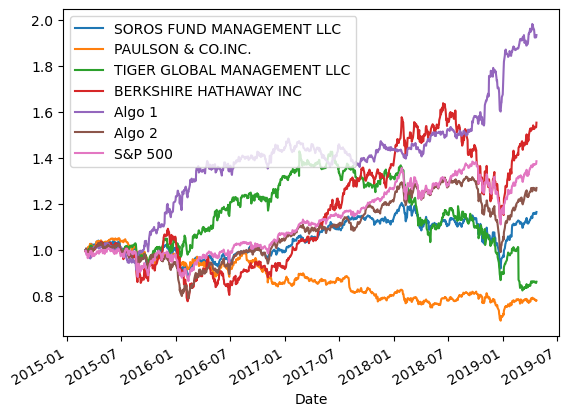

In [297]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()
cumulative_returns.head()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

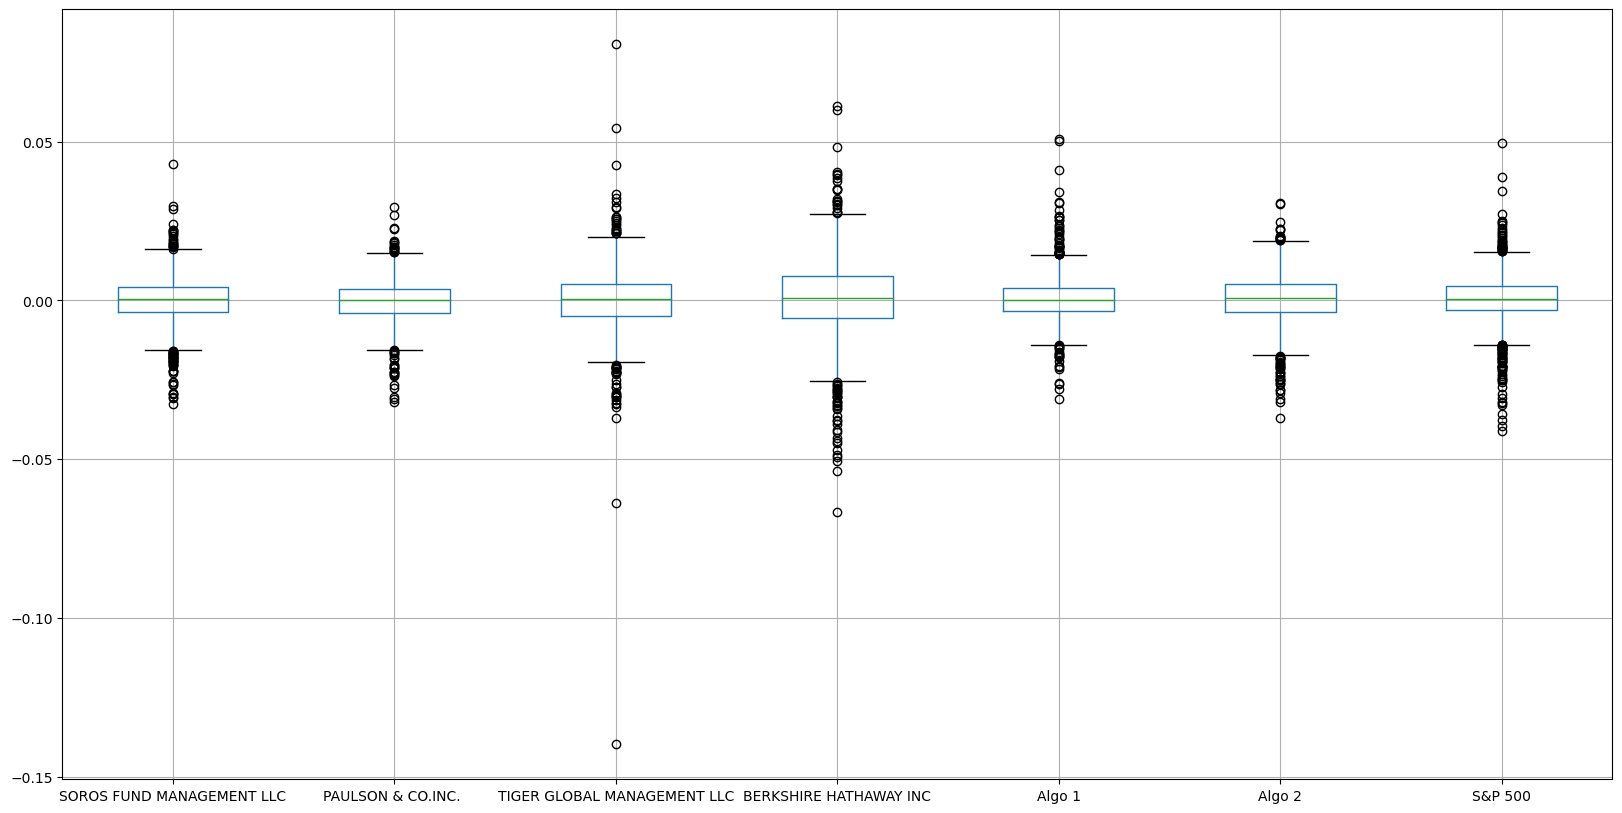

In [298]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [299]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
print(combined_df_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [300]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
riskier = combined_df_std[combined_df_std > combined_df_std["S&P 500"]]
print("Below Portfolios are Riskier because their std is GREATER than SP500:")
print(riskier) 

Below Portfolios are Riskier because their std is GREATER than SP500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [301]:
# Calculate the annualized standard deviation (252 trading days)
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

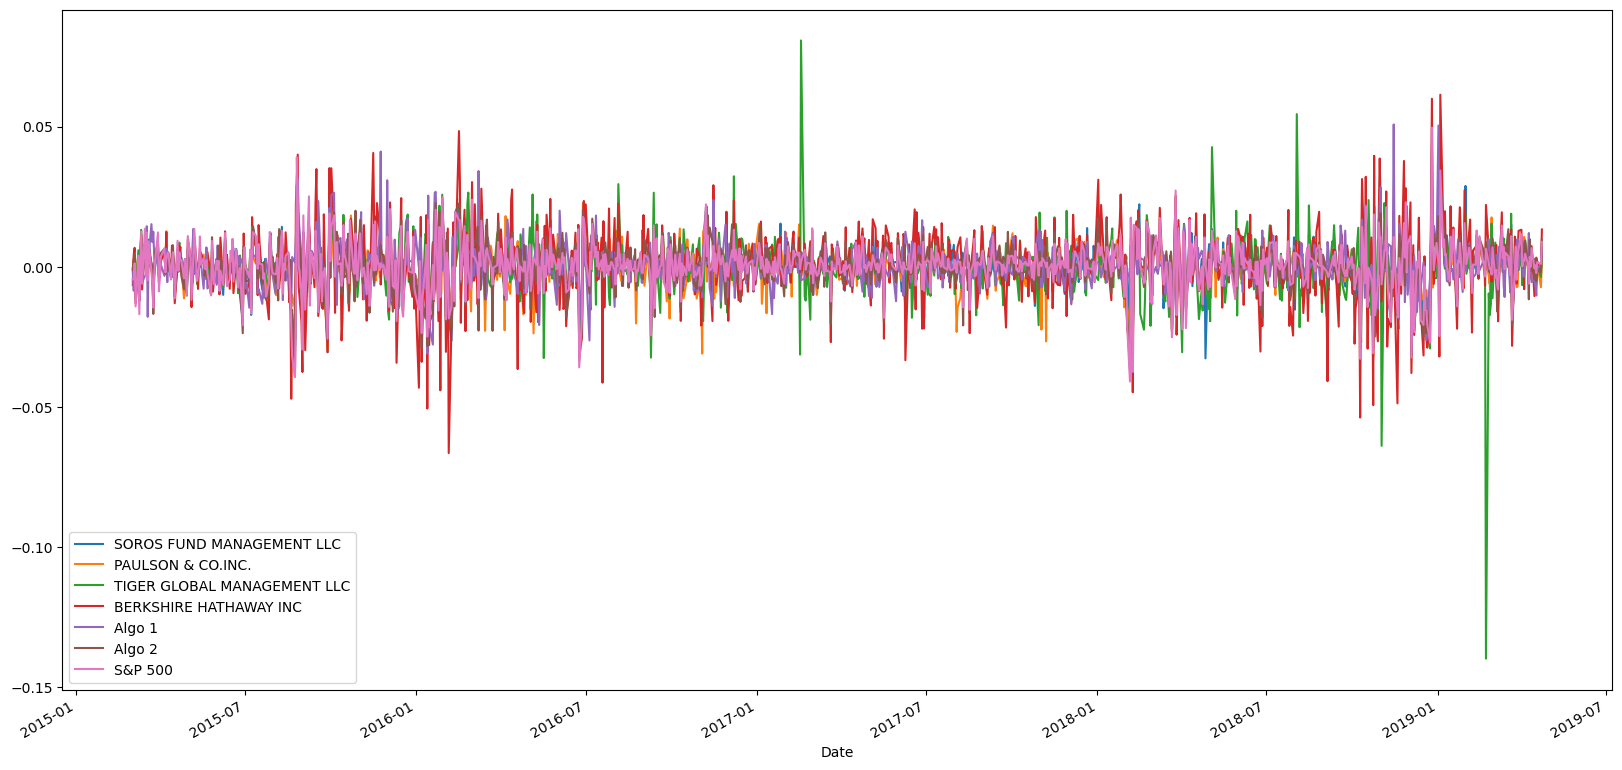

In [302]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

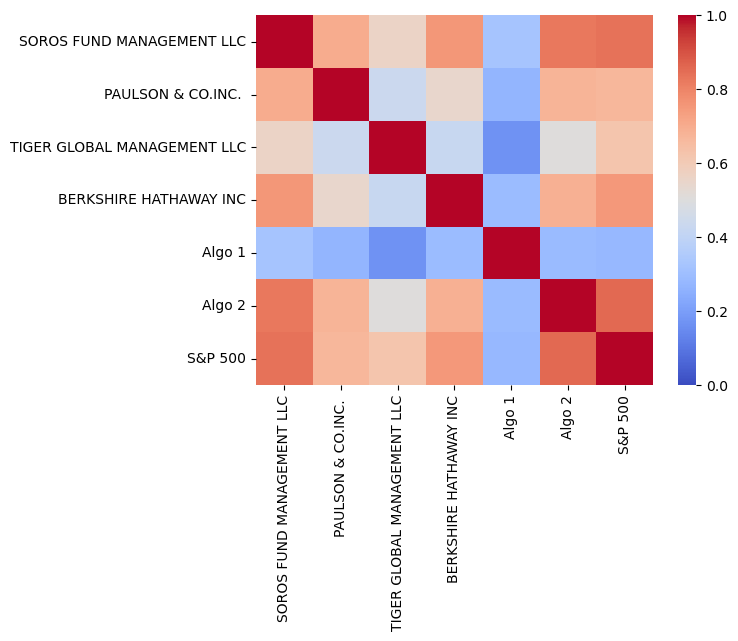

In [303]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=0, vmax=1, cmap='coolwarm')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [304]:
# Calculate covariance of a single portfolio
covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
covariance = covariance.dropna()
covariance

Date
2015-05-27    0.000036
2015-05-28    0.000036
2015-05-29    0.000036
2015-06-01    0.000036
2015-06-02    0.000034
                ...   
2019-04-16    0.000016
2019-04-17    0.000014
2019-04-18    0.000014
2019-04-22    0.000014
2019-04-23    0.000014
Length: 984, dtype: float64

In [305]:
# Calculate variance of S&P 500
variance = combined_df['S&P 500'].rolling(window=60).var()
variance = variance.dropna()
variance

Date
2015-05-27    0.000053
2015-05-28    0.000052
2015-05-29    0.000053
2015-06-01    0.000053
2015-06-02    0.000049
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 984, dtype: float64

In [306]:
# Computing beta
df_beta = covariance / variance
df_beta = df_beta.dropna()
df_beta

Date
2015-05-27    0.686327
2015-05-28    0.690174
2015-05-29    0.692355
2015-06-01    0.691368
2015-06-02    0.697001
                ...   
2019-04-16    0.386909
2019-04-17    0.383682
2019-04-18    0.383226
2019-04-22    0.383434
2019-04-23    0.380797
Length: 984, dtype: float64

<Axes: title={'center': 'TIGER GLOBAL MANAGEMENT LLC Beta'}, xlabel='Date'>

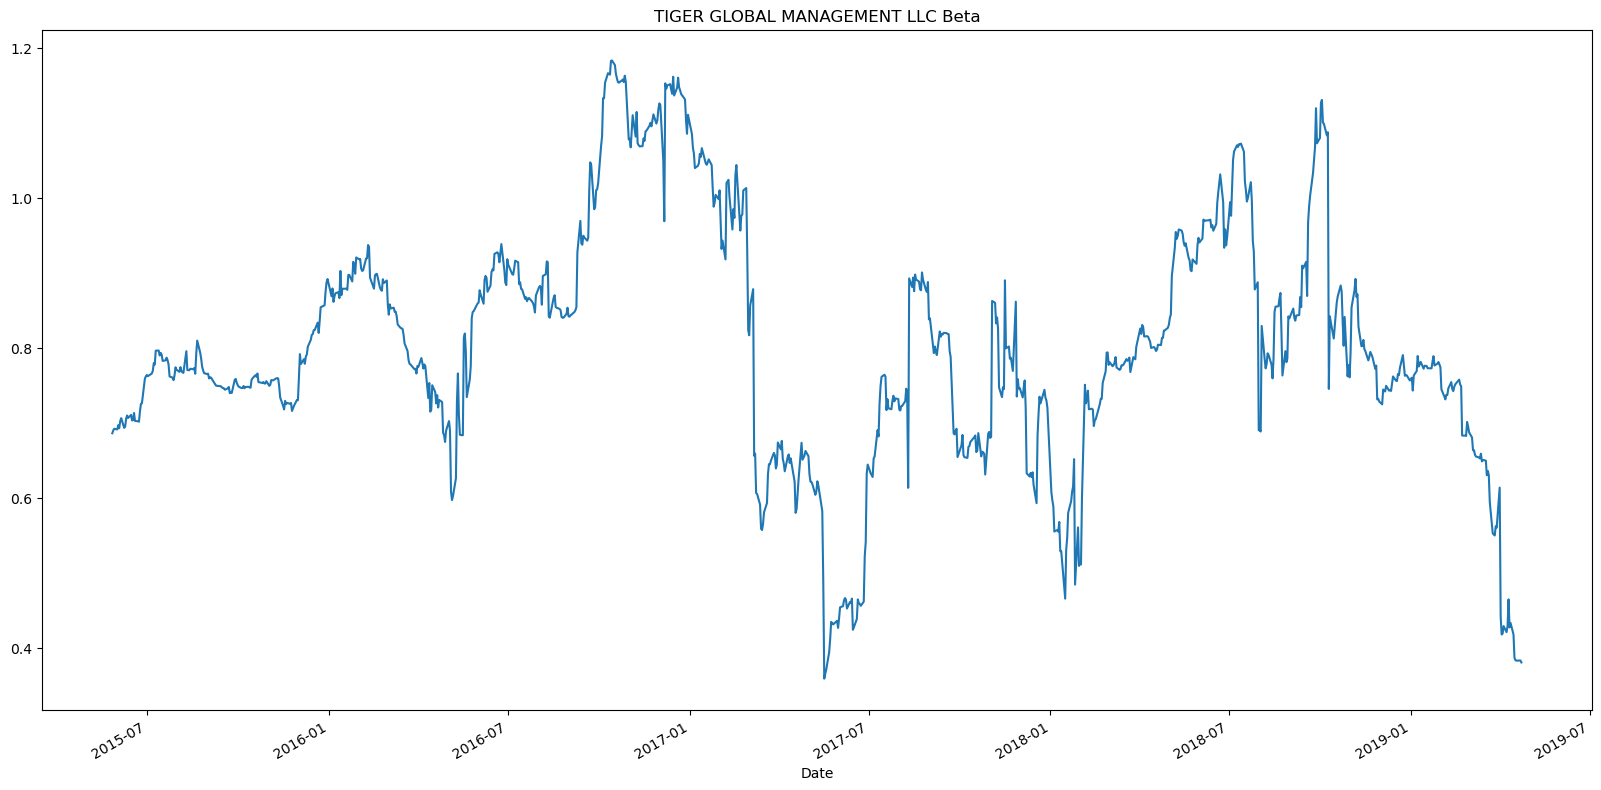

In [307]:
# Plot beta trend
df_beta.plot(figsize=(20,10), title='TIGER GLOBAL MANAGEMENT LLC Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average - 21 Day Half-life'}, xlabel='Date'>

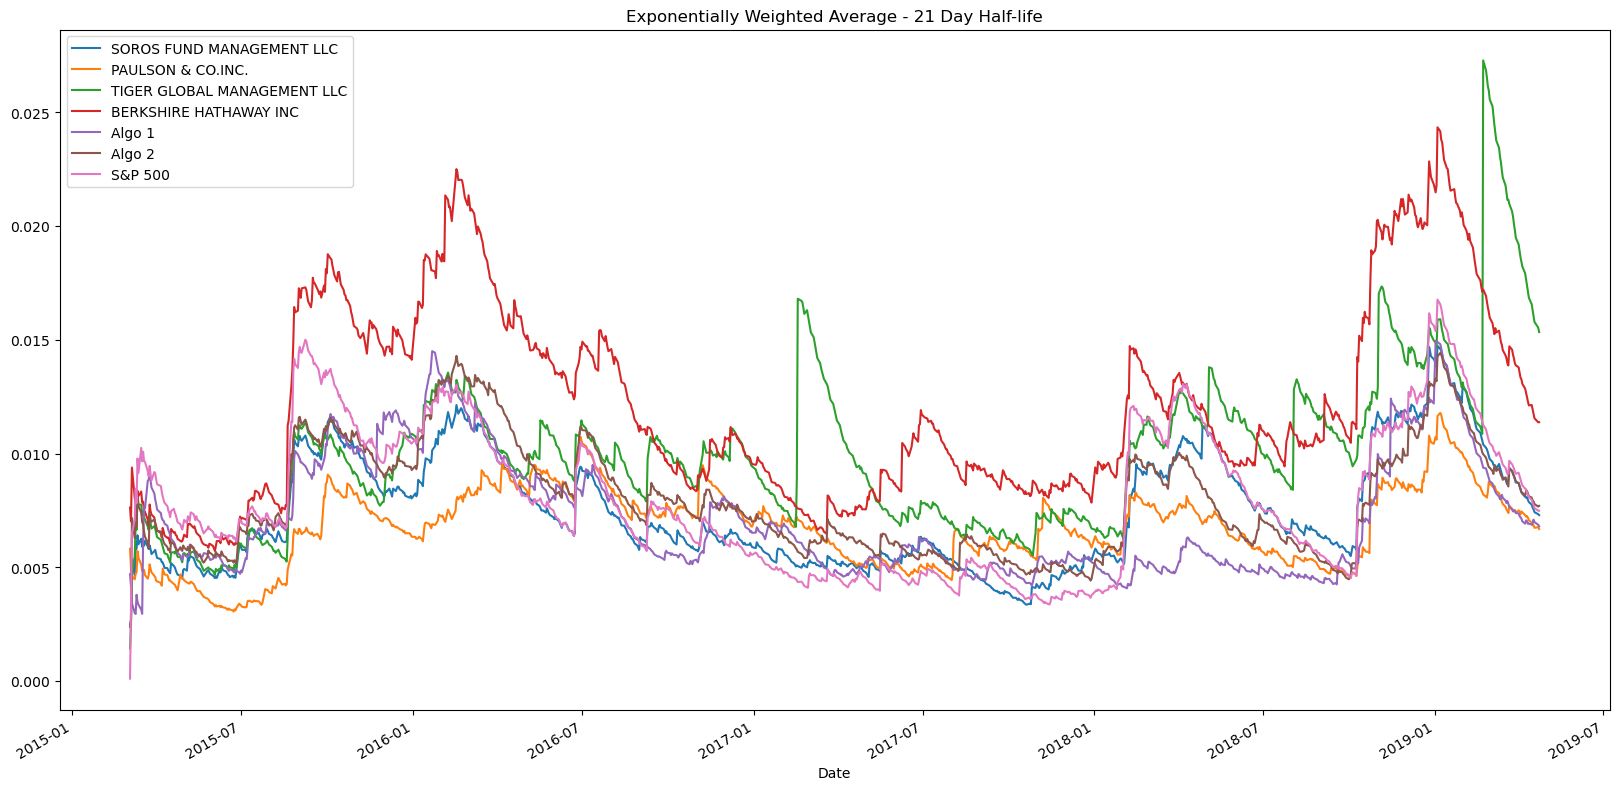

In [308]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10),title='Exponentially Weighted Average - 21 Day Half-life')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [309]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252)) 
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

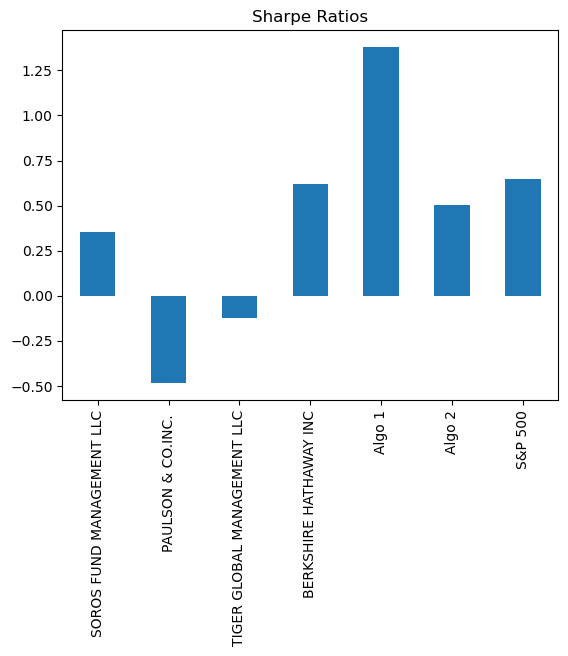

In [310]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [311]:
# Reading data from 1st stock
aapl_csvpath = Path("Resources/aapl_historical.csv")
aapl_return = pd.read_csv(aapl_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_return.drop(columns=['Symbol'], inplace=True)
aapl_return.head()

C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\361061528.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_return = pd.read_csv(aapl_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [312]:
# Reading data from 2nd stock
cost_csvpath = Path("Resources\cost_historical.csv")
cost_return = pd.read_csv(cost_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_return.drop(columns=['Symbol'], inplace=True)
cost_return.head()

C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\1581772467.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_return = pd.read_csv(cost_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [313]:
# Reading data from 3rd stock
goog_csvpath = Path("Resources\goog_historical.csv")
goog_return = pd.read_csv(goog_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_return.drop(columns=['Symbol'], inplace=True)
goog_return.head()

C:\Users\oakos\AppData\Local\Temp\ipykernel_20148\2110084223.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_return = pd.read_csv(goog_csvpath,index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [314]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([aapl_return,cost_return,goog_return], axis = "columns", join = "inner")
combined_stocks.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [315]:
# Reset Date index
combined_stocks.sort_index(inplace=True)
combined_stocks.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [316]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns=['AAPL','COST','GOOG']
combined_stocks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [317]:
# Calculate daily returns
combined_daily_returns = combined_stocks.pct_change()
combined_daily_returns.head()
# Drop NAs
combined_daily_returns = combined_daily_returns.dropna()
# Display sample data
combined_daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [318]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [319]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df = pd.concat([combined_df,portfolio_returns], axis='columns', join='inner')
combined_returns_df.sort_index(inplace=True)
combined_returns_df.columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500','Custom Portfolio']
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [320]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df = combined_returns_df.dropna()
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [321]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std= combined_returns_df.std()
combined_daily_std.head()

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
dtype: float64

In [322]:
# Calculate the annualized `std`
combined_annualized_std_1= combined_daily_std * np.sqrt(252)
combined_annualized_std_1.head()

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [323]:
# Calculate rolling standard deviation
combined_returns_df.rolling(window=21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-06-12,0.005177,0.004675,0.009127,0.008367,0.004459,0.004390,0.005925,0.006288
2018-06-13,0.005402,0.004694,0.009156,0.008636,0.004512,0.004550,0.006027,0.006462
2018-06-14,0.005469,0.004659,0.009157,0.008457,0.004583,0.004886,0.005774,0.006002
2018-06-15,0.005206,0.004564,0.009359,0.008770,0.004644,0.004875,0.005756,0.005783
2018-06-18,0.005177,0.004569,0.009449,0.008564,0.004459,0.004799,0.005784,0.005752
...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.007507
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.007668
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470,0.007482
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094,0.006539


<Axes: >

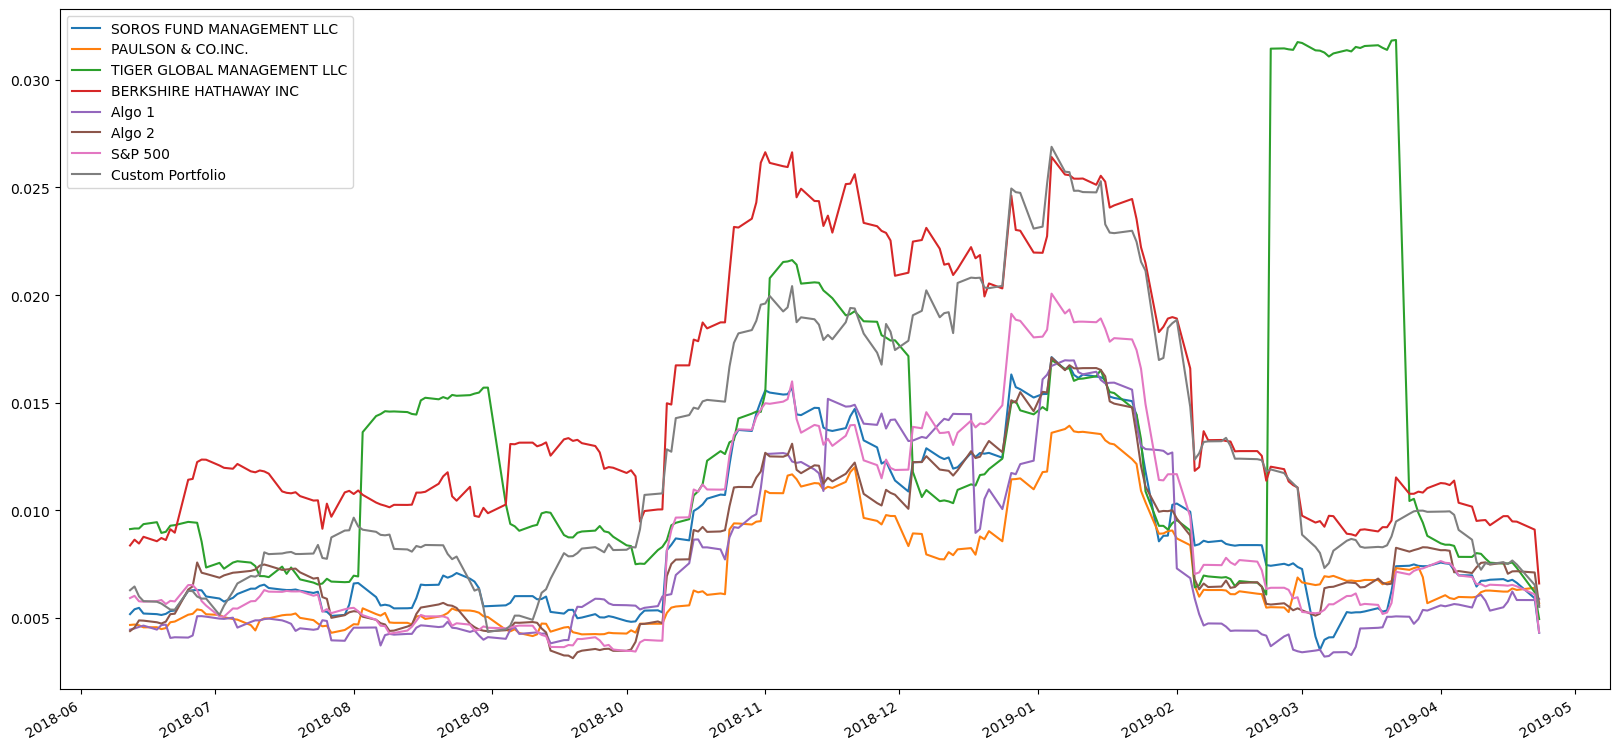

In [324]:
# Plot rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [325]:
# Calculate and plot the correlation
Correlation_2 = combined_returns_df.corr()
Correlation_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<Axes: >

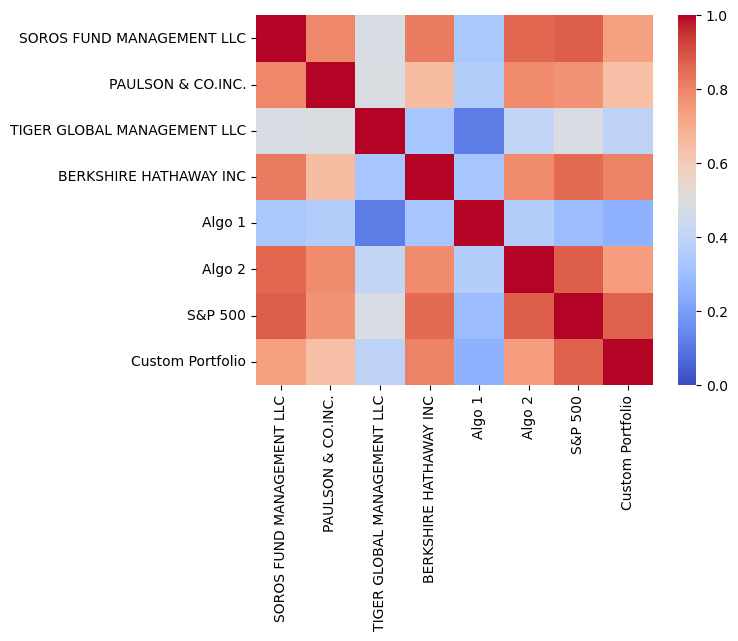

In [326]:
# Display de correlation matrix
sns.heatmap(Correlation_2, vmin=0, vmax=1, cmap='coolwarm')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [327]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance_2 = combined_returns_df['PORTFOLIO RETURNS'].rolling(window=60).cov(combined_returns_df['S&P 500'])
covariance_2 = covariance_2.dropna()
covariance_2

KeyError: 'PORTFOLIO RETURNS'

In [ ]:
# Calculate variance of S&P 500

variance_2 = combined_returns_df['S&P 500'].rolling(window=60).var()
variance_2 = variance_2.dropna()
variance_2

2018-08-07    0.000031
2018-08-08    0.000031
2018-08-09    0.000030
2018-08-10    0.000031
2018-08-13    0.000031
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 178, dtype: float64

In [ ]:
# Computing beta
df_beta_2 = covariance_2 / variance_2
df_beta_2 = df_beta_2.dropna()
df_beta_2

2018-08-07    1.002827
2018-08-08    1.002226
2018-08-09    0.990029
2018-08-10    0.966199
2018-08-13    0.957121
                ...   
2019-04-16    1.173574
2019-04-17    1.138133
2019-04-18    1.138551
2019-04-22    1.137941
2019-04-23    1.129204
Length: 178, dtype: float64

<Axes: title={'center': 'Portfolio Beta'}>

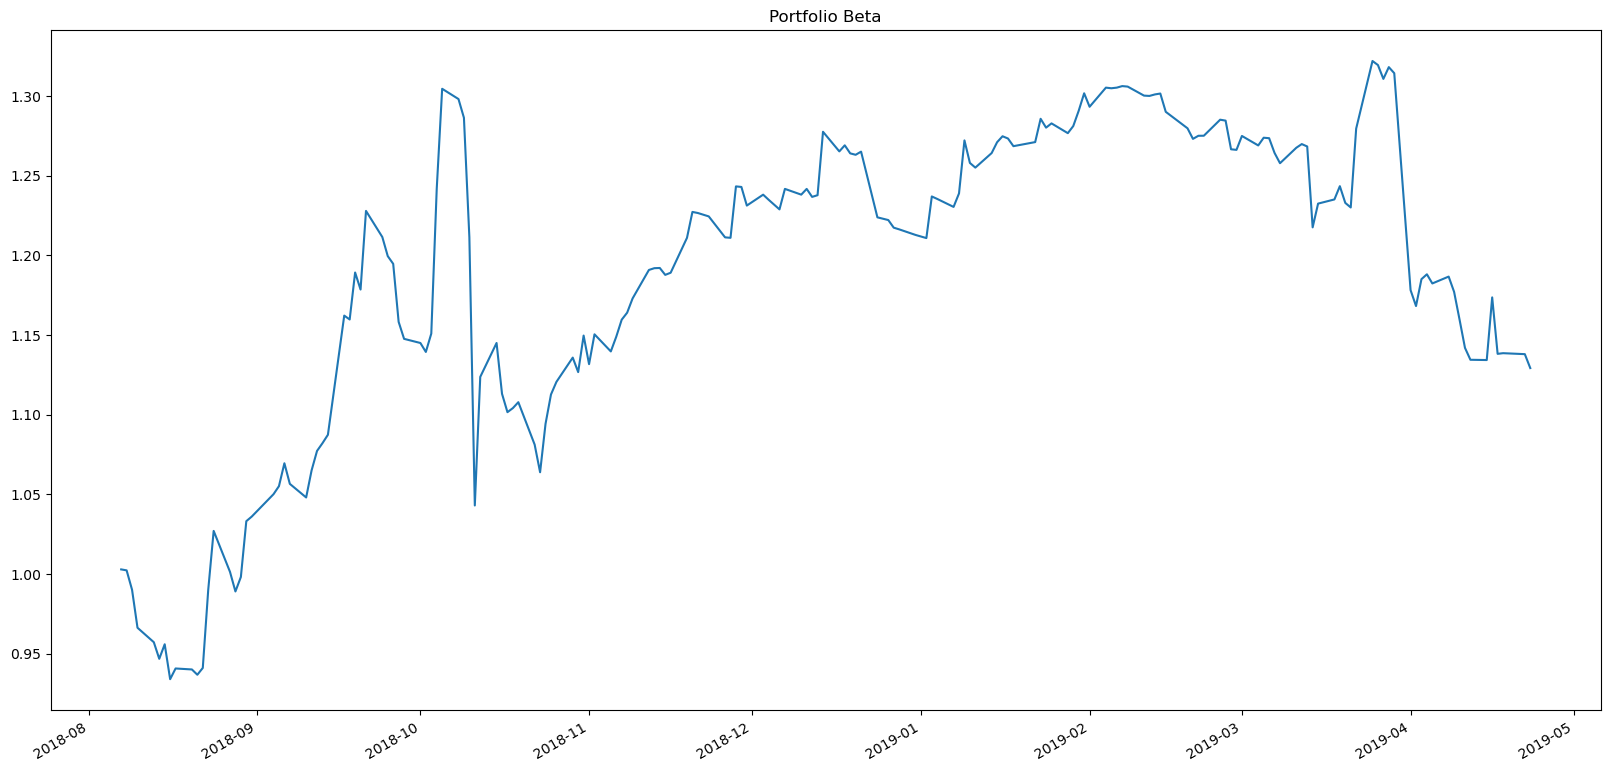

In [ ]:
# Plot beta trend
df_beta_2.plot(figsize=(20,10), title='Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (combined_returns_df.mean() * 252) / (combined_daily_std * np.sqrt(252)) 
sharpe_ratios_2.head()

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
dtype: float64

<Axes: title={'center': 'Portfolio Sharpe Ratios'}>

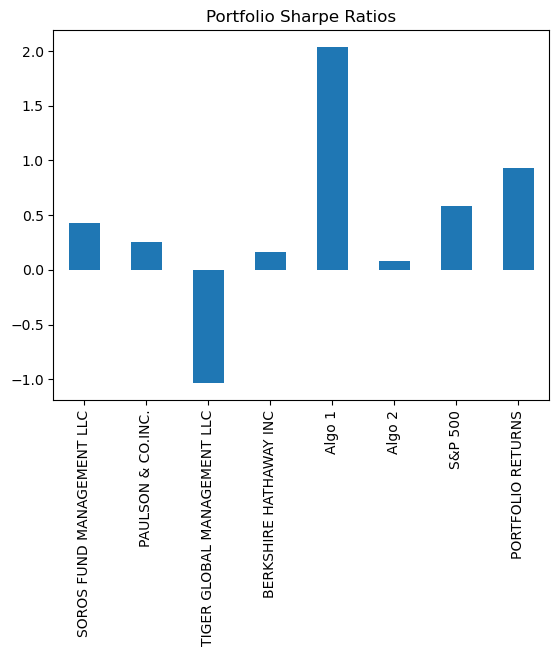

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar(title='Portfolio Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
# Base on the above assessment, Berkshire Hathaway Inc and Tiger Global Management has high standard deviation which means they have high risk investment. Algo 1 has a good correlation  with a low correlation figures and also Algo has a good sharpe ratio than the other investment. Algo has low risk of investment base on the standard deviation. To conclude Algo is a better investment plan as compared to other portfolios.